<div id='imports'
     style = "display: fill;
              border-radius: 50px;
              background-color: #051087;
              color:white;
              text-align:center;
              padding:10px 0">
    <h1>Introduction : Titanic Survival</h1>
 </div>
  


Hi , In this notebook I have figured out how many people survived in titanic.


* Introduction

Import Libraries
Load data
Run Statistical summeries
Figure out missing value columns

* Visualizations

Correlation with target variable

* Missing values imputation

train data Missing columns- Embarked,Age,Cabin
test data Missing columns- Age and Fare

* Feature Engineering

Calculate total family size
Get title from name
Find out which deck passenger belonged to
Dealing with Categorical Variables
Label encoding
Feature Scaling

* Prediction

Split into training & test sets
Build the model
Feature importance
Predictions
Ensemble : Majority voting

* Submission

<h1>Importing Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Load train & test data</h1>

In [2]:
titanic_train = pd.read_csv('./data/train.csv')
print('shape of data is ',titanic_train.shape)
titanic_train.head(20)

shape of data is  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_test = pd.read_csv('./data/test.csv')
print('shape of data is',titanic_test.shape)
titanic_test.head()


shape of data is (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h1>Handling missing values</h1>

In [4]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


here we can see that age has got 714 values but all other column's have got 891 values so age is missing 891-714= **177** values.
Now we are gonna make them fill with an appropriate substitute.

In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here by using info method in pandas we have further investigated the missing data in Cabin and embarked columns. Also we have known the data types of all the columns by using info method.

In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now lets find the correlation between variables so that we can use appropriate variables for missing data handling.

In [7]:
correlation = titanic_train.corr()
correlation


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<h1> Data Visualization </h1>

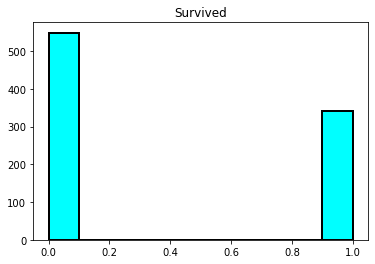

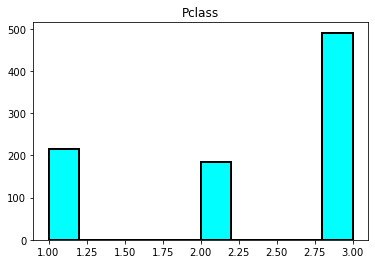

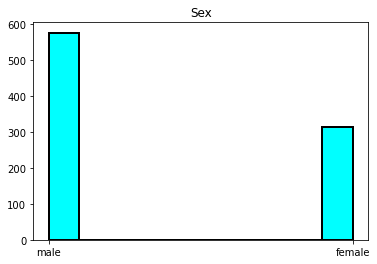

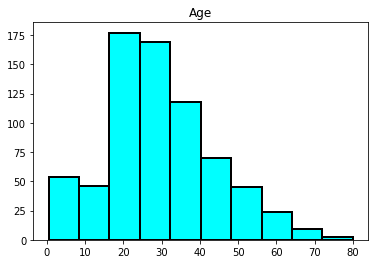

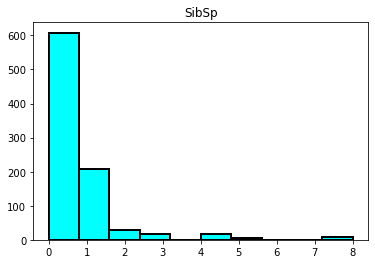

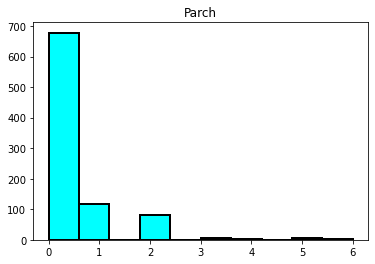

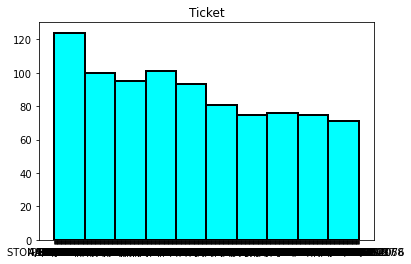

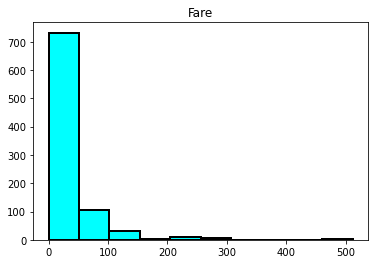

In [8]:
features_train = ['Survived',  'Pclass', 'Sex',
       'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare']

for i in features_train:
    plt.hist(titanic_train[i], color='cyan', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

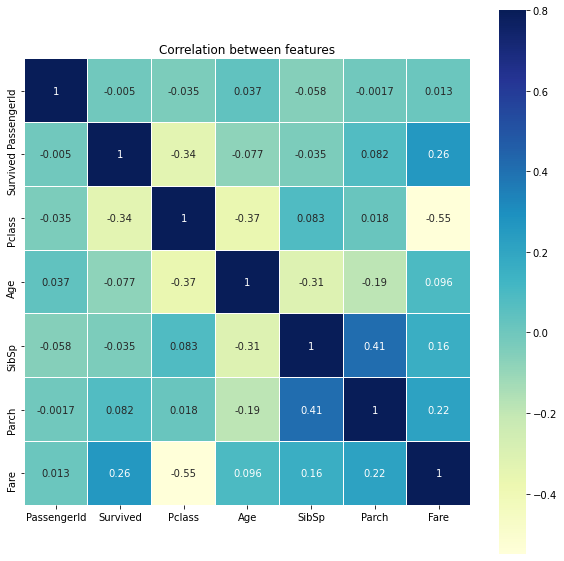

In [9]:
# fig = px.imshow(titanic_train.corr())
# fig.show()

plt.figure(figsize=(10, 10))

sns.heatmap(correlation, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

<h1>Missing Value Imputation</h1
Its important to fill missing values, because some machine learning algorithms can't accept them eg SVM.

But filling missing values with mean/median/mode is also a prediction which may not be 100% accurate, instead you can use models like Decision Trees and Random Forest which handle missing values very well.

First lets deal with Embarked column

In [10]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Here we have picked only those values in Embarked column that are missing.
**EDA :** 
here we can see that both have same fare and pclass. So now lets find from where they are embarked.
We will judge on basis of pclass.

As Embarked is a categorical value so we would use mode of that so replace the missing values. But would take mode based on a appropriate value which in this case is p class and fare. 
So **Box Plot** is the best way to measure mode of a pandas series.

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

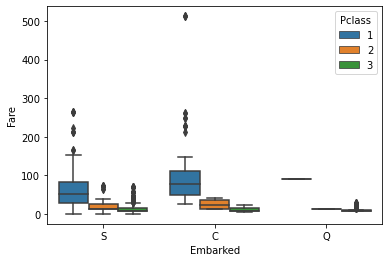

In [11]:
sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=titanic_train)

Here we can see the category which has **Fare mode** equal to 80 is **C**. 
So we can replace these missing values with "C" value.

In [12]:
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('C')


We have handled missing valiues in Embarked column . Now its turn for age column's missing values but we cant fix them right now as it requires feature engineering and feature scaling. So first lets do that part and then handle age.

<h2>Missing values in test data set for fare column</h2>

In [13]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Here we can see that **Age** column has 90 and **fare** has 1 missing values.

Right now we will handle fare value and later in this notebook we will handle missing values in Age.

In [14]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


we can replace missing value in fare by taking median of all fares of those passengers </br>
who share **3rd Passenger** class and **Embarked from 'S'**

In [15]:
median_fare = titanic_test[(titanic_test['Pclass']==3) & (titanic_test['Embarked']=='S')]['Fare'].median()
titanic_test['Fare']=titanic_test['Fare'].fillna(median_fare)

In [16]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h1>Feature Engineering</h1>

### Here we will use feature engineerin to handle missing values in **Cabin** column for both train and test data set.
### We will create a new column **Block** which will be extracted from Cabin's first letter.

Now we will use feature engineering to make a new column called **Block**. This solves our problem of missing values in column **Cabin**

### Block- On which block were passengers on the ship?

In [17]:
titanic_train['Block'] = titanic_train['Cabin'].str[0]
titanic_test['Block'] = titanic_test['Cabin'].str[0]

titanic_train['Block'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [18]:
titanic_train = titanic_train.assign(Block=titanic_train.Block.astype(object))

In [19]:
fig = px.box(titanic_train, x="Block", y="Age",points='all',facet_col="Pclass")
fig.show()

In [20]:
titanic_train.Block.fillna('Z', inplace=True)
titanic_test.Block.fillna('Z', inplace=True)
# titanic_train["Block"].unique() # Z is for null values
titanic_test["Block"].unique() 

array(['Z', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

<h1>Convert Categorical variables into Numerical ones</h1>

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex','Block']
for col in cat_vars:
    titanic_train[col]=labelEnc.fit_transform(titanic_train[col])
    titanic_test[col]=labelEnc.fit_transform(titanic_test[col])

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Block
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,8


### Handling missing values for Age Column

Age seems to be promising feature. So it doesnt make sense to simply fill null values out with median/mean/mode.

We will use **Random Forest algorithm** to predict ages.

In [22]:
# fig = px.histogram(titanic_train["Age"].dropna(), x="Age", marginal="rug")

fig = px.histogram(titanic_train["Age"].dropna(), x="Age")

fig.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def handle_blank_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp','Pclass','Block']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [24]:
titanic_train = handle_blank_age(titanic_train)
titanic_test = handle_blank_age(titanic_test)

In [25]:
fig = px.histogram(titanic_train["Age"].dropna(), x="Age")

fig.show()

<h1>Feature Scaling </h1>

We can see that Age, Fare are measured on different scales, so we need to do Feature Scaling first before we proceed with predictions.

In [26]:
from sklearn import preprocessing

train_scaller = preprocessing.StandardScaler().fit(titanic_train[['Age','Fare']])
titanic_train[['Age','Fare']] = train_scaller.fit_transform(titanic_train[['Age','Fare']])

test_scaller = preprocessing.StandardScaler().fit(titanic_test[['Age','Fare']])
titanic_test[['Age','Fare']] = test_scaller.fit_transform(titanic_test[['Age','Fare']])


## Correlation of features with target

In [27]:
titanic_train.corr()["Survived"]


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.052737
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked      -0.174199
Block         -0.301116
Name: Survived, dtype: float64

<h1> Prediction of Survival </h1>

### Here we will use Linear Regression to predict the survival of the passengers.

<h1> Linear Regression </h1>

In [28]:
from sklearn.model_selection import train_test_split
predictors = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare","Embarked","Block"]

X_train, X_test, y_train, y_test = train_test_split(titanic_train[predictors],titanic_train['Survived'],test_size=0.33,random_state=20)

print('Shape of X_train =',X_train.shape,'Shape of y_train = ',y_train.shape)
print('Shape of X_test=',X_test.shape,'Shape of y_train = ',y_test.shape)

Shape of X_train = (596, 8) Shape of y_train =  (596,)
Shape of X_test= (295, 8) Shape of y_train =  (295,)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lr = LinearRegression()

lr.fit(X_train,y_train)

predictions = lr.predict(X_test)

In [30]:

predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0

In [31]:
accuracy_score(predictions, y_test)


0.7898305084745763

## Logistic Regression

In [32]:
# from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

predictors = ["Pclass", "Sex", "Fare", "Embarked","Block","Age","Parch"]

# Initialize our algorithm
lg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

scores = cross_val_score(lg, titanic_train[predictors], 
                                          titanic_train["Survived"],scoring='f1',cv=cv)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.7411798471738533


In [33]:
lg.fit(titanic_train[predictors],titanic_train['Survived'])

LogisticRegression(random_state=1)

In [34]:
train_predictions = lg.predict(titanic_train[predictors])
train_predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy =',accuracy_score(titanic_train['Survived'], train_predictions))

# accuracy=sum(titanic_train["Survived"]==train_predictions)/len(titanic_train["Survived"])
# accuracy

Accuracy = 0.7946127946127947


<h2>Random Forest</h2>

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

import numpy as np
predictors = ["Pclass", "Sex", "Age",
              "Fare","Block"]

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
rf = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, 
                            min_samples_leaf=1)
kf = KFold( n_splits=5, random_state=4,shuffle=True)
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

predictions = cross_val_predict(rf, titanic_train[predictors],titanic_train["Survived"],cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(rf, titanic_train[predictors], titanic_train["Survived"],
                                          scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print('Accuracy=',scores.mean())

Accuracy= 0.7581343204075892


## XGBOOST

In [38]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
predictors = ["Pclass", "Sex", "Age","Fare","Block"]
xgb.fit(titanic_train[predictors],titanic_train['Survived'])

cv = ShuffleSplit(n_splits=12, test_size=0.3, random_state=30)
scores = cross_val_score(xgb, titanic_train[predictors], titanic_train["Survived"], scoring='f1',cv=cv)
print('Accuracy=',scores.mean())




Accuracy= 0.7564539325608296


In [91]:
# predictors = ["Pclass", "Sex", "Fare", "Embarked","Block","Age","Parch"]
predictors = ["Pclass", "Sex", "Age","Fare","Block"]

b = np.array(titanic_train[predictors].iloc[1]).reshape(1,-1)
print(b)

pred = xgb.predict(b)
pred

[[1.         0.         0.62473836 0.78684529 2.        ]]


array([1])

<h1>Importing Pickle<h1>

## Picking the model file for deployment

In [92]:
import pickle

In [94]:
pickle.dump(xgb,open('xgbmodel.pkl','wb'))

In [96]:
pickled_model = pickle.load(open('xgbmodel.pkl','rb'))

In [104]:
print(test_scaller.fit_transform([[23],[400]]))
print(test_scaller.fit_transform([[400],[23]]))

# test_scaller = preprocessing.StandardScaler().fit(titanic_test[['Age','Fare']])
# titanic_test[['Age','Fare']] = test_scaller.fit_transform(titanic_test[['Age','Fare']])


[[-1.]
 [ 1.]]
[[ 1.]
 [-1.]]


### prediction using pickled file

In [106]:
pickled_model.predict(np.array(titanic_train[predictors].iloc[1]).reshape(1,-1))

array([1])